In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

# Import the linear regression module from the scikit learn library.
from sklearn.linear_model import LinearRegression

**OBS**.: A classe `LinearRegression` da bibioteca SciKit-Learn implementa a equação normal.

In [2]:
# Resetando gerador de sequências pseudo-aleatórias de forma que os resultados apresentados sejam sempre os mesmos.
np.random.seed(1234)

### Gerando a função observável.

A **função objetivo** é dada por

$$y = 4 + 3x,$$

e a **função observável** (versão ruidosa da função objetivo, $y$) por

$$y_{noisy} = y + w,$$

onde $w$ é o ruído adicionado às amostras da função objetivo.

In [3]:
# Number of observations (pairs of features and labels).
N = 100 

# Attribute.
x = 2.0*np.random.rand(N, 1)

# Target function.
y = 4.0 + 3.0*x  # equação de uma reta.

# Standard Normal Gaussian Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

### Comparando a função observável com a função objetivo.

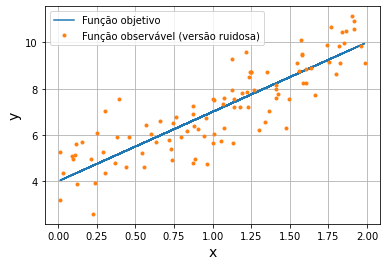

In [4]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='Função objetivo')
plt.plot(x, y_noisy, '.', label='Função observável (versão ruidosa)')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Encontrando a solução ótima com a equação normal implementada com a biblioteca NumPy.

A função hipótese utilizada neste exemplo é dada por

$$h(\textbf{x}) = \hat{y} = \hat{a}_0 + \hat{a}_1 x,$$

a qual pode ser re-escrita em formato matricial como

$$ \hat{\textbf{y}} = X\hat{\textbf{a}}.$$

**OBS**.: percebam que temos o peso de bias, $\hat{a}_0$, portanto, precisamos criar um vetor com todos os valores iguais a 1 para poder representar a função hipótese na forma matricial.

In [5]:
# np.c_ concatenates vectors.
X = np.c_[np.ones((N, 1)), x] # add column vector x0 with all values equal to 1.

# Solve by applying the least-Squares method.
# We use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix.
# We use dot() method for matrix multiplication.
a_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_numpy[0, 0]))
print('a1: %1.4f' % (a_numpy[1, 0]))

a0: 4.0763
a1: 2.9413


#### Realizando predições com a função hipótese e calculando o erro quadrático médio obtido com ela.

Usamos a função hipótese em sua forma matricial,

$$ \hat{\textbf{y}} = X\hat{\textbf{a}},$$
para realizar predições com os valores de $x$.

In [6]:
# Performing predictions with the hypothesis function.
yhat_numpy = X.dot(a_numpy)

# Calculating the Mean Squared Error (MSE).
Je_optimum = (1.0/N)*np.sum(np.power((y_noisy - yhat_numpy), 2))

# Print the MSE.
print('MSE: %1.6f' % Je_optimum)

MSE: 0.927258


### Encontrando a solução ótima com a equação normal implementada pela biblioteca Scikit-learn

Solução equivalente à implementada com a biblioteca NumPy usando a biblioteca Scikit-Learn.

In [7]:
# Instantiate the LinearRegression class.
reg = LinearRegression()

# Train the model.
reg.fit(x, y_noisy)

print('a0: %1.4f' % (reg.intercept_[0])) # Value that crosses the y-axis when all features are equal to 0.
print('a1: %1.4f' % (reg.coef_[0, 0]))   # parameters associated with the features.

a0: 4.0763
a1: 2.9413


### Observações

+ Toda classe da biblioteca SciKit-Learn possui um método `fit` para treinamento do modelo.
+ Percebam que o argumento $x$ passado para o método `fit` da classe `LinearRegression` é uma matriz com $N \times K$.
+ Porém, lembrem-se que neste exemplo temos peso $a_0$ e, portanto, $x$ deveria ter dimensão $N \times K+1$. 
+ Entretanto, **por padrão**, a classe `LinearRegression` já faz isso automaticamente. 
+ Caso sua função hipótese não considere o peso $a_0$, então, durante a instanciação da classe `LinearRegression` vocês devem configurar o parâmetro `fit_intercept=False`.
+ Documentação da classe:
    + https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Realizando predições com a função hipótese e calculando o erro quadrático médio obtido com ela.

+ A classe `LinearRegression` possui um método `predict` que realiza as predições para o vetor ou matriz de atributos passado como parâmetro de entrada.

In [8]:
# Performing predictions with the hypothesis function.
yhat_sklearn = reg.predict(x)

# Calculating the Mean Squared Error (MSE).
Je_sklearn = (1.0/N)*np.sum(np.power((y_noisy - yhat_sklearn), 2))

# Print the MSE.
print('MSE: %1.6f' % Je_sklearn)

MSE: 0.927258


### Comparando os resultados.

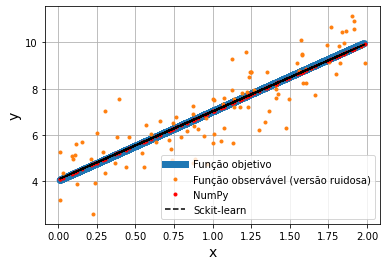

In [9]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='Função objetivo', linewidth=7)
plt.plot(x, y_noisy, '.', label='Função observável (versão ruidosa)')
plt.plot(x, yhat_numpy, 'r.', label='NumPy', linewidth=4)
plt.plot(x, yhat_sklearn, 'k--', label='Sckit-learn')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Observações

+ Com apenas 100 amostras, os valores obtidos são próximos dos exatos, porém, o ruído limita a aproximação.
+ Se aumentarmos o número de exemplos, conseguimos melhorar a aproximação $N \to \infty \therefore \hat{a}_0 \to a_0$ e $\hat{a}_1 \to a_1$.
+ Porém, percebam que para termos valores idênticos aos exatos, teríamos que ter um número de amostras tendendo ao infinito, o que na prática, não é possível devido a limitações computacionais (e.g., memória e CPU).
+ Outra possibilidade para melhorar a aproximação é obter amostras com menor quantidade de ruído (e.g., ruído com menor variância), mas na maioria dos casos, por não termos controle sobre o processo de geração das amostras, isso se torna impossível.
+ Idealmente, para $N \to \infty$, então $\hat{a}_0 =  a_0$, $\hat{a}_1 = a_1$ e $\hat{y} = y$. Portanto
$$\lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2 = E[w^2].$$
ou seja, o menor valor possível para o MSE será igual ao momento de ordem 2 do ruído, e, como ele tem média igual a zero, ele torna igual a sua variância.